In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.dates as mpl_dates

In [10]:
a = [1, 2, 3]
b = [1, 2, 3]
s = [a[i] + b[i] for i in range(len(a))]
s

[2, 4, 6]

In [6]:
df_sap_bloom = pd.read_csv('SAP BLOOM 10032020.csv', sep=';', header=0)

df_sap_bloom['date'] = df_sap_bloom['date'].str[11:]
day_to_string = datetime(2020, 3, 10).strftime('%Y-%m-%d')
df_sap_bloom['date'] = day_to_string + " " + df_sap_bloom['date']
df_sap_bloom['date'] = pd.to_datetime(df_sap_bloom['date'])
df_sap_bloom = df_sap_bloom.set_index(pd.DatetimeIndex(df_sap_bloom['date']))
df_sap_bloom = df_sap_bloom.drop(columns='date')
df_sap_bloom['hl'] = df_sap_bloom.high - df_sap_bloom.low
df_sap_bloom = df_sap_bloom.sort_index(axis=0)
df_sap_bloom = df_sap_bloom.dropna()

df_sap_bloom

,open,high,low,close,hl
date,,,,,
2020-03-10 11:02:00,100.42,100.44,99.89,100.30,0.55
2020-03-10 11:03:00,100.34,100.52,100.26,100.38,0.26
2020-03-10 11:04:00,100.40,100.52,100.26,100.32,0.26
2020-03-10 11:05:00,100.26,100.34,100.08,100.12,0.26
2020-03-10 11:06:00,100.16,100.38,100.08,100.32,0.30
...,...,...,...,...,...
2020-03-10 19:26:00,101.54,101.68,101.18,101.18,0.50
2020-03-10 19:27:00,101.20,101.28,101.16,101.16,0.12
2020-03-10 19:28:00,101.14,101.26,100.96,100.96,0.30


In [7]:
df_sap_chix_1 = pd.read_csv('SAP CHIX 10032020.csv', sep=',', header=0)
df_sap_chix_1['Time'] = df_sap_chix_1['Time'].astype(str)
df_sap_chix_1['Time'] = df_sap_chix_1['Time'].str[:15]
df_sap_chix_1['Time'] = pd.to_datetime(df_sap_chix_1['Time'])
df_sap_chix_1 = df_sap_chix_1.drop([0])
df_sap_chix_1['Time'] = df_sap_chix_1['Time'] + timedelta(hours=3)
df_sap_chix_1 = df_sap_chix_1.set_index('Time')
df_sap_chix_1 = df_sap_chix_1.drop(['EventSymbol', '#=TimeAndSale', 'EventTime', 'Sequence', 'ExchangeCode', 'Size', 'BidPrice', 'AskPrice', 'SaleConditions', \
                  'Flags'], axis=1)

df_sap_chix_1

,Price
Time,
2020-03-10 11:02:23,100.36
2020-03-10 11:02:24,100.40
2020-03-10 11:02:24,100.40
2020-03-10 11:02:24,100.42
2020-03-10 11:02:26,100.12
...,...
2020-03-10 11:59:49,102.22
2020-03-10 11:59:49,102.22
2020-03-10 11:59:49,102.20


In [21]:
df_sap_chix_2 = pd.read_csv('SAP CHIX 10032020 1.csv', sep=',', header=0)
df_sap_chix_2['Time'] = df_sap_chix_2['Time'].astype(str)
df_sap_chix_2['Time'] = df_sap_chix_2['Time'].str[:15]
df_sap_chix_2['Time'] = pd.to_datetime(df_sap_chix_2['Time'])
df_sap_chix_2 = df_sap_chix_2.drop([0])
df_sap_chix_2['Time'] = df_sap_chix_2['Time'] + timedelta(hours=3)
df_sap_chix_2 = df_sap_chix_2.set_index('Time')
df_sap_chix_2 = df_sap_chix_2.drop(['EventSymbol', '#=TimeAndSale', 'EventTime', 'Sequence', 'ExchangeCode', 'Size', 'BidPrice', 'AskPrice', 'SaleConditions', \
                  'Flags'], axis=1)

df_sap_chix_2

,Price
Time,
2020-03-10 12:00:00,102.20
2020-03-10 12:00:00,102.20
2020-03-10 12:00:00,102.18
2020-03-10 12:00:00,102.18
2020-03-10 12:00:00,102.16
...,...
2020-03-10 12:59:48,102.78
2020-03-10 12:59:48,102.78
2020-03-10 12:59:50,102.76


In [9]:
df_sap_chix = pd.concat([df_sap_chix_1, df_sap_chix_2])
df_sap_chix

,Price
Time,
2020-03-10 11:02:23,100.36
2020-03-10 11:02:24,100.40
2020-03-10 11:02:24,100.40
2020-03-10 11:02:24,100.42
2020-03-10 11:02:26,100.12
...,...
2020-03-10 12:59:48,102.78
2020-03-10 12:59:48,102.78
2020-03-10 12:59:50,102.76


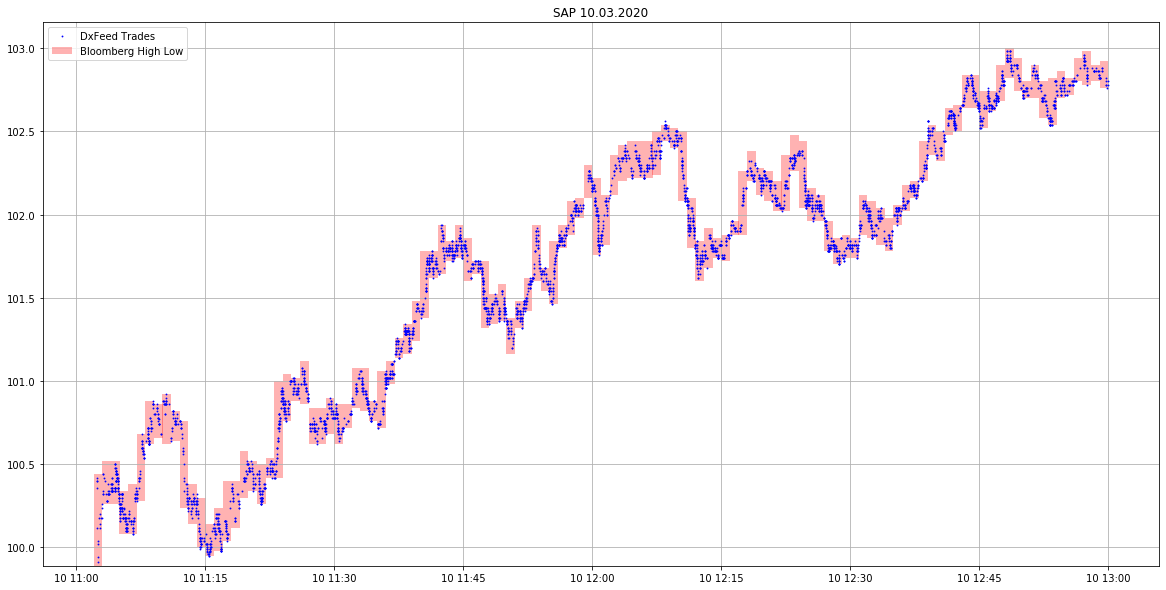

In [18]:
df_sap_bloom = df_sap_bloom.loc[:'2020-03-10 12:59:00']

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df_sap_chix, 'bp', ms=1, label='DxFeed Trades')
ax.bar(df_sap_bloom.index, df_sap_bloom.hl, bottom=df_sap_bloom.low, alpha=0.3, width=0.0007,  \
       color='red', align='edge', label='Bloomberg High Low')
ax.grid()
plt.title('SAP 10.03.2020')
plt.legend()
                  
plt.show()

In [13]:
df_sie_bloom = pd.read_csv('SIE BLOOM 10032020.csv', sep=';', header=0)

df_sie_bloom['date'] = df_sie_bloom['date'].str[11:]
df_sie_bloom['date'] = day_to_string + " " + df_sie_bloom['date']
df_sie_bloom['date'] = pd.to_datetime(df_sie_bloom['date'])
df_sie_bloom = df_sie_bloom.set_index(pd.DatetimeIndex(df_sie_bloom['date']))
df_sie_bloom = df_sie_bloom.drop(columns='date')
df_sie_bloom['hl'] = df_sie_bloom.high - df_sie_bloom.low
df_sie_bloom = df_sie_bloom.sort_index(axis=0)
df_sie_bloom = df_sie_bloom.dropna()

df_sie_bloom

,open,high,low,close,hl
date,,,,,
2020-03-10 11:02:00,81.53,81.60,81.35,81.40,0.25
2020-03-10 11:03:00,81.40,81.41,81.15,81.22,0.26
2020-03-10 11:04:00,81.19,81.27,81.11,81.14,0.16
2020-03-10 11:05:00,81.12,81.12,80.95,80.97,0.17
2020-03-10 11:06:00,81.00,81.10,80.97,81.03,0.13
...,...,...,...,...,...
2020-03-10 19:26:00,80.59,80.75,80.41,80.43,0.34
2020-03-10 19:27:00,80.46,80.47,80.40,80.44,0.07
2020-03-10 19:28:00,80.44,80.47,80.25,80.27,0.22


In [14]:
df_sie_chix_1 = pd.read_csv('SIE CHIX 10032020.csv', sep=',', header=0)
df_sie_chix_1['Time'] = df_sie_chix_1['Time'].astype(str)
df_sie_chix_1['Time'] = df_sie_chix_1['Time'].str[:15]
df_sie_chix_1['Time'] = pd.to_datetime(df_sie_chix_1['Time'])
df_sie_chix_1 = df_sie_chix_1.drop([0])
df_sie_chix_1['Time'] = df_sie_chix_1['Time'] + timedelta(hours=3)
df_sie_chix_1 = df_sie_chix_1.set_index('Time')
df_sie_chix_1 = df_sie_chix_1.drop(['EventSymbol', '#=TimeAndSale', 'EventTime', 'Sequence', 'ExchangeCode', 'Size', 'BidPrice', 'AskPrice', 'SaleConditions', \
                  'Flags'], axis=1)

df_sie_chix_1

,Price
Time,
2020-03-10 11:02:39,81.56
2020-03-10 11:02:39,81.53
2020-03-10 11:02:39,81.59
2020-03-10 11:02:39,81.59
2020-03-10 11:02:39,81.55
...,...
2020-03-10 11:59:59,83.40
2020-03-10 11:59:59,83.40
2020-03-10 11:59:59,83.40


In [15]:
df_sie_chix_2 = pd.read_csv('SIE CHIX 10032020 1.csv', sep=',', header=0)
df_sie_chix_2['Time'] = df_sie_chix_2['Time'].astype(str)
df_sie_chix_2['Time'] = df_sie_chix_2['Time'].str[:15]
df_sie_chix_2['Time'] = pd.to_datetime(df_sie_chix_2['Time'])
df_sie_chix_2 = df_sie_chix_2.drop([0])
df_sie_chix_2['Time'] = df_sie_chix_2['Time'] + timedelta(hours=3)
df_sie_chix_2 = df_sie_chix_2.set_index('Time')
df_sie_chix_2 = df_sie_chix_2.drop(['EventSymbol', '#=TimeAndSale', 'EventTime', 'Sequence', 'ExchangeCode', 'Size', 'BidPrice', 'AskPrice', 'SaleConditions', \
                  'Flags'], axis=1)

df_sie_chix_2

,Price
Time,
2020-03-10 12:00:01,83.38
2020-03-10 12:00:06,83.41
2020-03-10 12:00:07,83.42
2020-03-10 12:00:08,83.44
2020-03-10 12:00:08,83.44
...,...
2020-03-10 12:59:27,84.09
2020-03-10 12:59:32,84.04
2020-03-10 12:59:42,84.04


In [16]:
df_sie_chix = pd.concat([df_sie_chix_1, df_sie_chix_2])
df_sie_chix

,Price
Time,
2020-03-10 11:02:39,81.56
2020-03-10 11:02:39,81.53
2020-03-10 11:02:39,81.59
2020-03-10 11:02:39,81.59
2020-03-10 11:02:39,81.55
...,...
2020-03-10 12:59:27,84.09
2020-03-10 12:59:32,84.04
2020-03-10 12:59:42,84.04


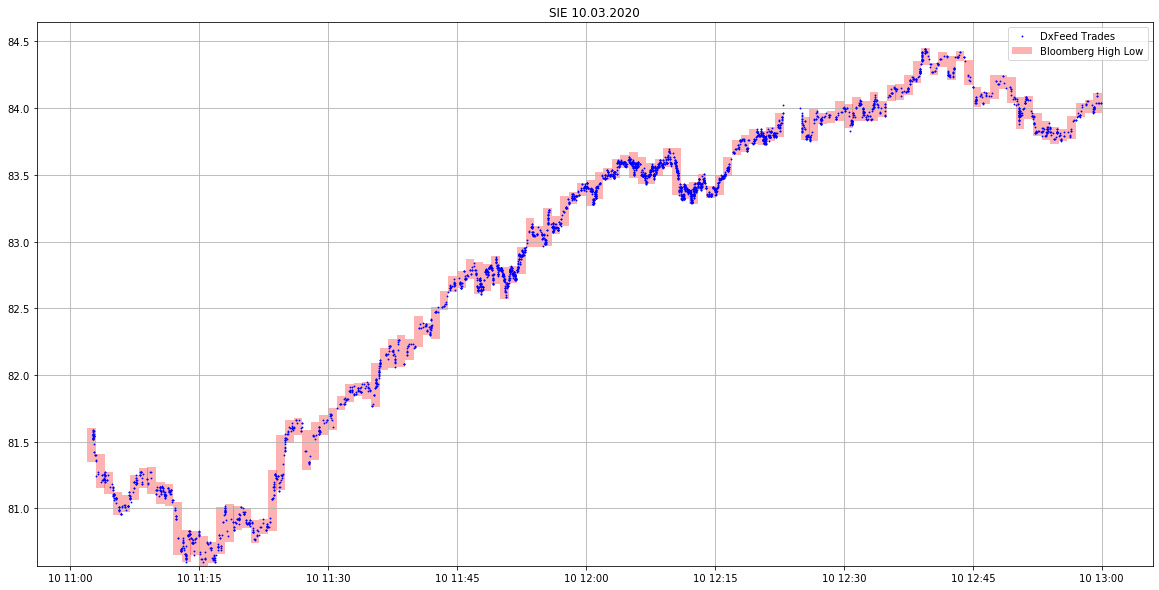

In [19]:
df_sie_bloom = df_sie_bloom.loc[:'2020-03-10 12:59:00']

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df_sie_chix, 'bp', ms=1, label='DxFeed Trades')
ax.bar(df_sie_bloom.index, df_sie_bloom.hl, bottom=df_sie_bloom.low, alpha=0.3, width=0.0007,  \
       color='red', align='edge', label='Bloomberg High Low')
ax.grid()
plt.title('SIE 10.03.2020')
plt.legend()
                  
plt.show()